Image manipulation demonstration created by Alex Frye, for use in Dr. Hoover's EE/CENG 441/541 Computer Vision class

In [1]:
import skimage
from skimage import io
from skimage import data
from skimage.transform import resize
from skimage.transform import rotate
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
import time
from scipy import signal
from scipy.ndimage import gaussian_filter

from Lab2_lib import *

In [2]:
header = 'P2Images/'
im_per_group = 6
im_titles = ['bikes/', 'graf/', 'leuven/', 'wall/']
im_set = [[], [], [], []];
im_set_gray = [[], [], [], []];
for i in range(len(im_titles)):
    title = header + im_titles[i]
    for j in range(im_per_group):
        im_set[i].append(io.imread(title + 'img' + str(j+1) + '.ppm'))
        im_set_gray[i].append(skimage.color.rgb2gray(io.imread(title + 'img' + str(j+1) + '.ppm')))

im_yosemite = [io.imread('P2Images/Yosemite/Yosemite1.jpg'), io.imread('P2Images/Yosemite/Yosemite2.jpg')]
im_yosemite_gray = [skimage.color.rgb2gray(im_yosemite[0]), skimage.color.rgb2gray(im_yosemite[1])]
im_triangle = io.imread('P2Images/triangle.png')
im_triangle_gray = skimage.color.rgb2gray(im_triangle)
im_checkerboard = io.imread('P2Images/checkerboard.jpg')
im_checkerboard_gray = skimage.color.rgb2gray(im_checkerboard)


(480, 640)
(480, 640)


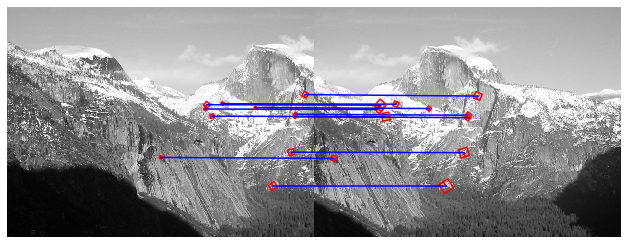

In [3]:
im0 = im_yosemite_gray[0]
im1 = im_yosemite_gray[1]
[im0, im1] = make_images_same_size([im0, im1])
print(np.shape(im0))
print(np.shape(im1))
#harris0 = detect_corners_harris(im0)
#harris1 = detect_corners_harris(im1)

#threshold = 0.2
#harris0 = threshold_image(harris0, threshold)
#harris1 = threshold_image(harris1, threshold)
#ajacent_images([im0, harris0])
#ajacent_images([im1, harris1])
#harris0_filt = local_maxima_dumb(harris0, 3)
#ajacent_images([im0, harris0, harris0_filt])
#harris1_filt = local_maxima_dumb(harris1, 3)
#ajacent_images([im1, harris1, harris1_filt])
d0 = features_descriptors(im0, s1=1, s2=2, pix_dist=3, threshold=0.1)
d1 = features_descriptors(im1, s1=1, s2=2, pix_dist=3, threshold=0.1)
matches = np.array(compare_features(d0, d1, threshold=0.03))
#plot_boxes_desc(d0, im0)
#plot_boxes_desc(d1, im1)
#print(np.shape(d0))
#print(np.shape(d1))
#print(np.shape(matches))
#print(matches[:,2])
connect_features(matches, im0, im1)
#ajacent_images([im0, im1])

In [4]:
f1s = d0
f2s = d1
threshold = 2
def compare_features(f1s, f2s, threshold=0.2):
    f1_shape = np.shape(f1s)[0]
    f2_shape = np.shape(f2s)[0]
    results = np.zeros((f1_shape, f2_shape))
    for i in range(f1_shape):
        for j in range(f2_shape):
            results[i, j] = diff_features(f1s[i], f2s[j])

    match = []
    for i in range(np.min([f1_shape, f2_shape])):
        mx = np.unravel_index(np.argmin(results, axis=None), results.shape)
        print(results[mx])
        if results[mx] < threshold:
            match.append([f1s[mx[0]], f2s[mx[1]], results[mx]])
        results[mx[0],:] = 10
        results[:,mx[1]] = 10
    return match

(1, 21, 21)

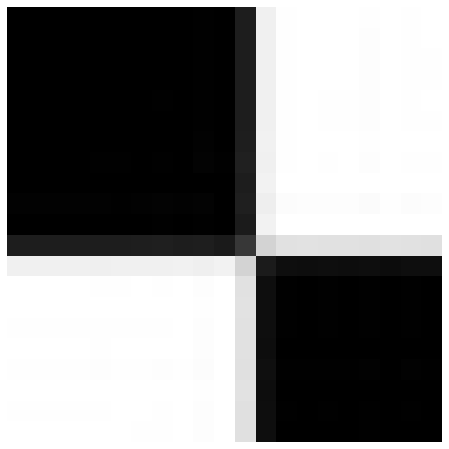

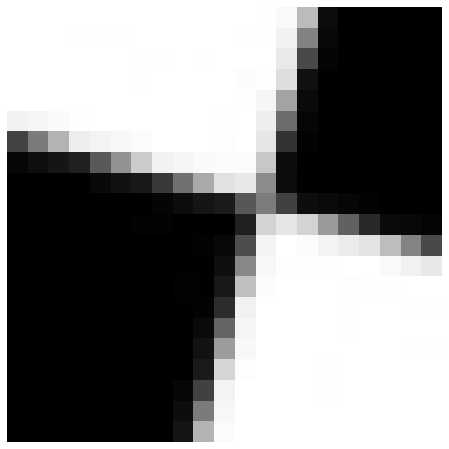

In [5]:
#fg = plt.figure(1)
#plt.imshow(im_checkerboard_gray, cmap='gray')
#plt.axis('off')
#showFeatures([100, 100], 150, 0.8)
#showFeatures([500, 100], 50, 0)
#showFeatures([100, 500], 50, 0)
#ajacent_images(rotate(im_checkerboard_gray, 23))
ajacent_images(grab_box(im_checkerboard_gray, [190, 190], 20))
ajacent_images(rotate_and_resize(im_checkerboard_gray, [190, 190], 1.3, 20))

#im = im_yosemite_gray[0]
#check, theta = detect_corners_harris(im, 3, 5)
#check_filt, check_filt2, result = local_maxima_descent(check, 3, 0.3)
#ajacent_images([im, check, check_filt, check_filt2])

In [6]:
index = np.split(result, 2, axis=1)
angles = theta[tuple(index)]
mag = check_filt2[tuple(index)]
#print(angles)
print(mag)
#print([result[0][1], result[0][0]][0])

ajacent_images(im)
#fg = plt.figure(1)
#plt.imshow(im, cmap='gray')
#plt.axis('off')

for i in range(len(angles)):
    showFeatures([result[i][1], result[i][0]], 50 * mag[i][0], theta[i][0])
i = 1
box = grab_box(im, [result[i][1], result[i][0]], 9)
print(np.shape(box))
ajacent_images(box)
print([result[i][1], result[i][0]], 5 * mag[i][0], theta[i][0])
#print(box)
showFeatures([4, 4], 10 * mag[i][0], theta[i][0])

NameError: name 'result' is not defined

In [ ]:
regions = []
regions.append([0, 0, 0])
regions.append([1, 1, 1])
print(regions)

In [ ]:
result0 = local_maxima_descent(harris0, 3, 0)
harris0_filt = np.zeros(np.shape(harris0))
index0 = np.split(result0, 2, axis=1)
harris0_filt[tuple(index0)] = 1
#harris0_filt = harris0_filt * harris0

result1 = local_maxima_descent(harris1, 3, 0)
harris1_filt = np.zeros(np.shape(harris1))
index1 = np.split(result1, 2, axis=1)
harris1_filt[tuple(index1)] = 1
#harris0_filt = harris0_filt * harris0

ajacent_images([harris0_filt, harris1_filt])

In [ ]:
x = 1
y = 1
print(x, y)
print(np.arctan2(y, x))

In [ ]:
s_1 = 3
s_2 = 5
plot_boxes(im_yosemite_gray[0], s1=3, s2=5, threshold=0.3)
plot_boxes(im_yosemite_gray[1], s1=3, s2=5, threshold=0.3)